In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

In [13]:
def composite_gauss(n, L, q, func):
    total = 0
    gauss_points, weights = leggauss(n)
    b = q**(L - 1)
    a = 0        
    scaled_points = 0.5 * (gauss_points + 1) * (b - a) + a
    total = sum(weights * (b - a) * func(scaled_points))    

    for i in range(1, L):        
        b = q**(L - i - 1)
        a = q**(L - i)               
        scaled_points = 0.5 * (gauss_points + 1) * (b - a) + a
        add = sum(weights * (b - a) * func(scaled_points))     
        total += add
        
        return total/2
    

def f(x, m):
    return x**m

In [14]:
for m in range(3):
    result = composite_gauss(5, 10, 0.15, lambda x: f(x, m))
    print(f"Integral of x^{m}:", result)


Integral of x^0: 2.5628906249999986e-07
Integral of x^1: 3.284204177856442e-14
Integral of x^2: 5.6113707320094045e-21


In [15]:
def f(x):
    return x**0.1*np.log(x)

In [16]:
EXACT_VALUE = -(1/1.1**2)

In [18]:
Errors = np.zeros((3, 19))
for i,q in enumerate((0.5, 0.15, 0.05)):
    for n in range(2,20):    
        Errors[i, n-1] = abs( composite_gauss(n, n, q, f)-EXACT_VALUE )

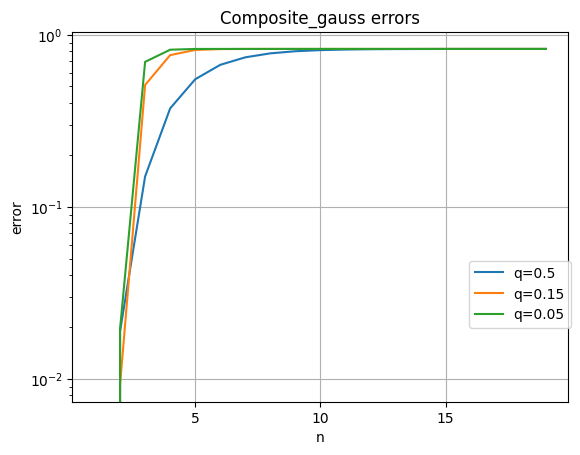

In [19]:
fig, ax = plt.subplots(1,1)
n = np.arange(1,20)
for i,q in enumerate((0.5, 0.15, 0.05)):
    ax.plot(n, Errors[i, :], label=f'q={q}')
ax.set(xlabel='n', ylabel='error', yscale='log', title='Composite_gauss errors',
       xticks=[5,10,15])
ax.legend(loc=(0.8,0.2))
ax.grid()

In [77]:
for i,q in enumerate((0.5, 0.15, 0.05)):
    inter, slope = np.polyfit(n, np.log(Errors[i,:]), 1)
    print(f'q = {q}, ...., C={np.exp(inter):.2}, b = {-slope:.2}')

q = 0.5, ...., C=0.65, b = 6.0
q = 0.15, ...., C=0.71, b = 7.2
q = 0.05, ...., C=0.62, b = 5.3
